<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


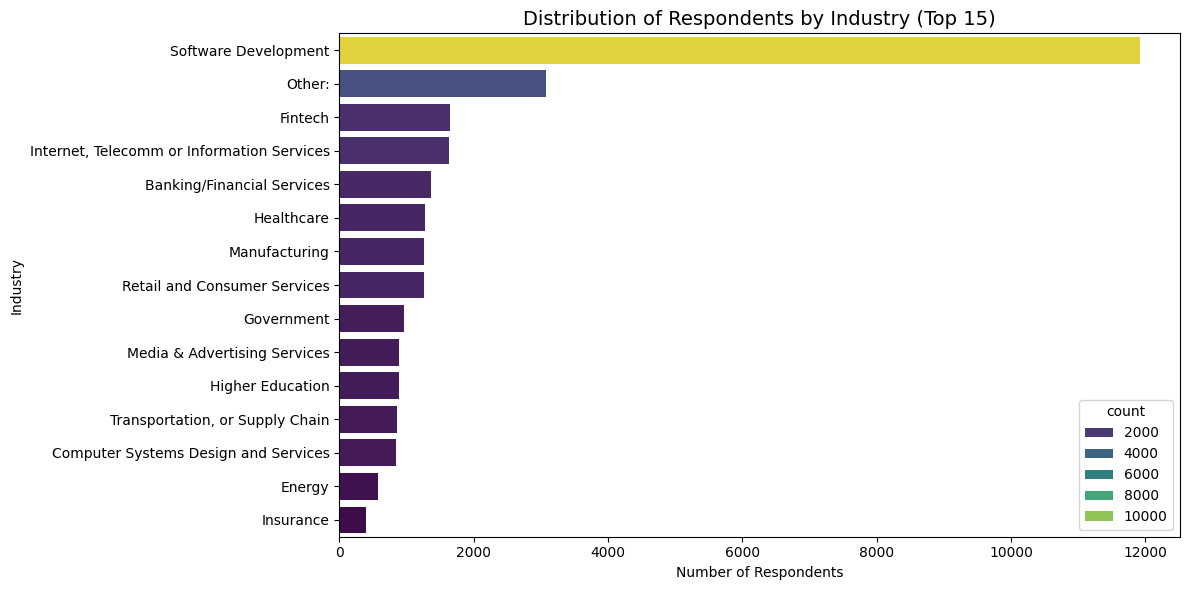

In [4]:
##Write your code here
# Drop missing values for clarity (optional)
industry_counts = df['Industry'].value_counts().dropna().head(15)  # top 15 industries

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=industry_counts.values, y=industry_counts.index, hue=industry_counts, palette='viridis')
plt.title('Distribution of Respondents by Industry (Top 15)', fontsize=14)
plt.xlabel('Number of Respondents')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [5]:
duplicates = df.drop(columns=['ResponseId']).duplicated()
num_duplicates = duplicates.sum()
print("Number of duplicate rows (excluding 'ResponseId'):", num_duplicates)
df=df[~duplicates]

Number of duplicate rows (excluding 'ResponseId'): 487


In [6]:
##Write your code here
comp_data = df['ConvertedCompYearly'].dropna()

# Step 2: Calculate statistics
mean_salary = comp_data.mean()
median_salary = comp_data.median()
std_salary = comp_data.std()

print(f"Mean: {mean_salary:,.0f}")
print(f"Median: {median_salary:,.0f}")
print(f"Standard Deviation: {std_salary:,.0f}")

# Step 3: Identify outliers (e.g., > 3 standard deviations above the mean)
threshold = mean_salary + 3 * std_salary
outliers = df[df['ConvertedCompYearly'] > threshold]

print(f"\nThreshold for high compensation: {threshold:,.0f}")
print(f"Number of outliers: {len(outliers)}")

Mean: 86,155
Median: 65,000
Standard Deviation: 186,757

Threshold for high compensation: 646,426
Number of outliers: 89


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Q1: 32,712
Q3: 107,972
IQR: 75,260
Lower Bound: -80,177
Upper Bound: 220,861
Number of Outliers: 978


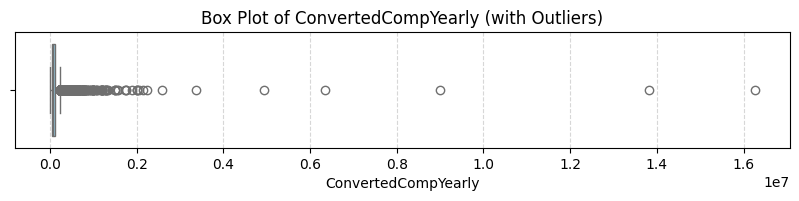

In [7]:
##Write your code here
Q1 = comp_data.quantile(0.25)
Q3 = comp_data.quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Identify outliers
outliers = comp_data[(comp_data < lower_bound) | (comp_data > upper_bound)]

print(f"Q1: {Q1:,.0f}")
print(f"Q3: {Q3:,.0f}")
print(f"IQR: {IQR:,.0f}")
print(f"Lower Bound: {lower_bound:,.0f}")
print(f"Upper Bound: {upper_bound:,.0f}")
print(f"Number of Outliers: {len(outliers)}")

#Visualize with a box plot
plt.figure(figsize=(10, 1.5))
sns.boxplot(x=comp_data, color='skyblue')
plt.title('Box Plot of ConvertedCompYearly (with Outliers)')
plt.xlabel('ConvertedCompYearly')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [8]:
##Write your code here
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filter out outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

#Validate size
print(f"Original dataset size: {df.shape[0]}")
print(f"New dataset size (without outliers): {df_no_outliers.shape[0]}")
print(f"Number of removed rows: {df.shape[0] - df_no_outliers.shape[0]}")

Original dataset size: 64950
New dataset size (without outliers): 22457
Number of removed rows: 42493


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [13]:
##Write your code here
print(df['Age'].value_counts(dropna=False))
age_map = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}

# Create a new column with numeric age, excluding 'Prefer not to say'
df = df[df['Age'] != 'Prefer not to say']
df.loc[:,'AgeNumeric'] = df['Age'].map(age_map)

Age
25-34 years old       23681
35-44 years old       14878
18-24 years old       13939
45-54 years old        6238
55-64 years old        2574
Under 18 years old     2548
65 years or older       772
Name: count, dtype: int64


In [14]:
numeric_cols = df.select_dtypes(include='number')

# Calculate correlation matrix
age_correlations = numeric_cols.corr()['AgeNumeric'].sort_values(ascending=False)
print(age_correlations)

AgeNumeric             1.000000
WorkExp                0.850422
ConvertedCompYearly    0.121548
JobSat                 0.069779
CompTotal             -0.002759
JobSatPoints_1        -0.027840
ResponseId            -0.033647
JobSatPoints_8        -0.046001
JobSatPoints_6        -0.050140
JobSatPoints_4        -0.076083
JobSatPoints_9        -0.081591
JobSatPoints_7        -0.082617
JobSatPoints_5        -0.101421
JobSatPoints_11       -0.107031
JobSatPoints_10       -0.114336
Name: AgeNumeric, dtype: float64


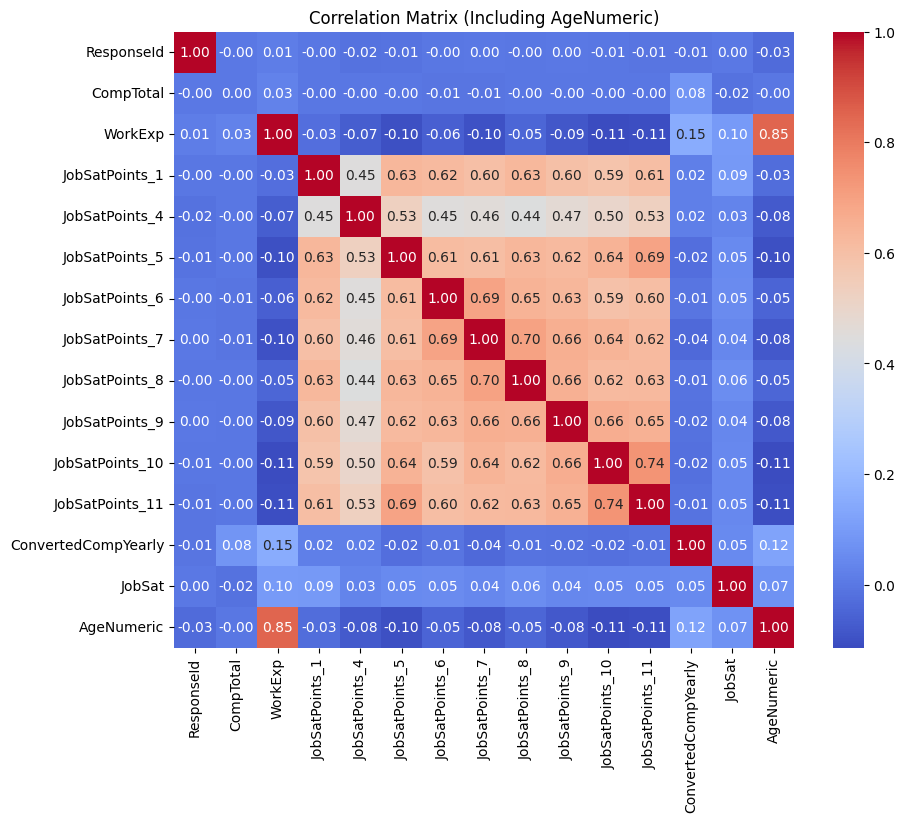

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Matrix (Including AgeNumeric)")
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
